# AutoRegressive Integrated Moving Average
- https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
- 3 parameters, Autoregressive (p), integration / degree of differencing (d), moving average (q)
- seasonal has additional 3 parameters for the seasonal component, and the seasonal frequency
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html
- arima(1,0,0): y(t) = c + a*y(t-1) + err(t)
- arima(1,0,1): y(t) = c + a*y(t-1) + err(t) + b*err(t-1)
- arima(0,1,0): y(t) - y(t-1) = c + err(t), y(t-1) is also By(t)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fcns import *
from statsmodels.tsa.arima_model import ARIMA

In [2]:
lynx_df = pd.read_csv('datasets/lynx_data.csv', header=0, names=['year', 'trappings'], index_col=0)
lynx_df.head()

,trappings
year,
1821,269
1822,321
1823,585
1824,871
1825,1475


In [3]:
lynx_ts = pd.Series(lynx_df['trappings'].values, index=pd.date_range('1821', periods=114, freq='A-DEC'))
lynx_ts.head()

1821-12-31     269
1822-12-31     321
1823-12-31     585
1824-12-31     871
1825-12-31    1475
Freq: A-DEC, dtype: int64

- If the data is stationary (as this is), set d=0
- use pacf plot for parameter p, acf plots for parameter q (in general)

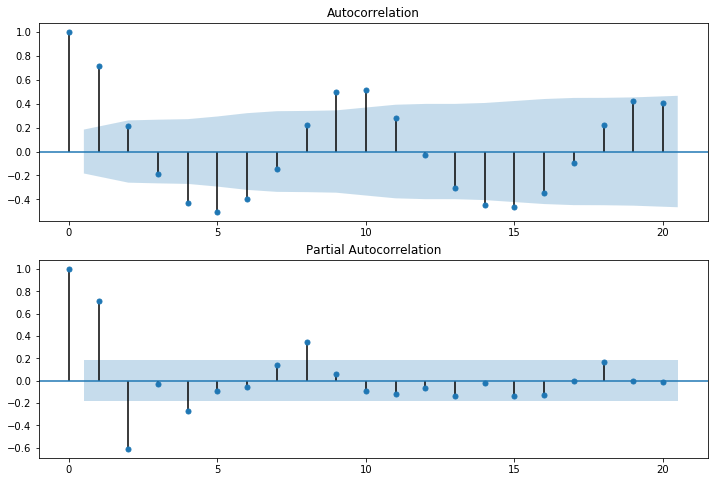

In [4]:
plot_autocorrelation(lynx_ts, 20)

C:\Users\darrahts\Anaconda3\envs\tfgpu\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


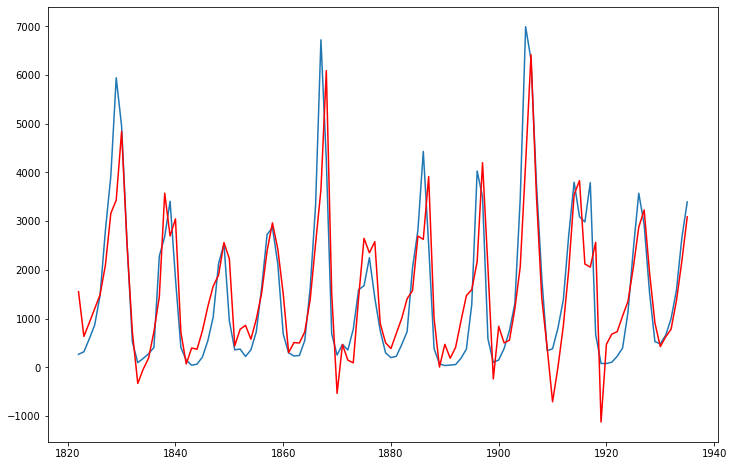

In [5]:
model = ARIMA(lynx_ts, order=(4,0,2))
res   = model.fit()
fig = plt.figure(figsize=(12,8))
plt.plot(lynx_ts)
plt.plot(res.fittedvalues, color='red')
plt.show()

In [6]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  114
Model:                     ARMA(4, 2)   Log Likelihood                -926.581
Method:                       css-mle   S.D. of innovations            811.024
Date:                Mon, 28 Oct 2019   AIC                           1869.162
Time:                        10:50:50   BIC                           1891.051
Sample:                    12-31-1821   HQIC                          1878.045
                         - 12-31-1934                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1553.6153    125.621     12.367      0.000    1307.403    1799.828
ar.L1.y        1.9972      0.169     11.808      0.000       1.666       2.329
ar.L2.y       -2.2827      0.234     -9.751      0.000      -2.742      -1.824
ar.L3.y        1.4099      0.190      7.412      0.000       1.037       1.783
ar.L4.y       -0.5681      0.102     -5.555      0.000      -0.768      -0.368
ma.L1.y       -0.9693      0.208     -4.660      0.000      -1.377      -0.562
ma.L2.y        0.6975      0.107      6.520      0.000       0.488       0.907
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8474           -0.6488j            1.0673           -0.1040
AR.2            0.8474           +0.6488j            1.0673            0.1040
AR.3            0.3935           -1.1792j            1.2432           -0.1987
AR.4            0.3935           +1.1792j            1.2432            0.1987
MA.1            0.6949           -0.9751j            1.1974           -0.1515
MA.2            0.6949           +0.9751j            1.1974            0.1515
-----------------------------------------------------------------------------
"""

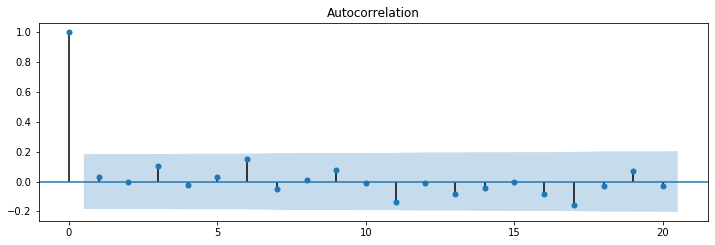

In [7]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(res.resid, lags=20, ax=ax1)

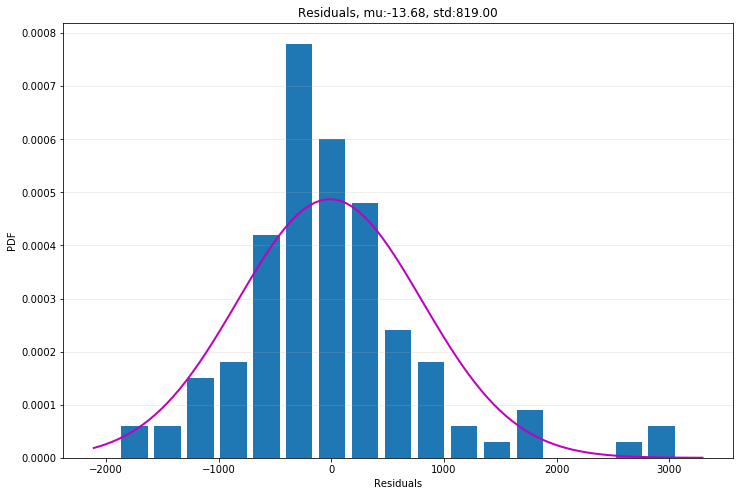

In [14]:
plot_norm(data=res.resid, label="residuals", title='Residuals', bins='auto', density=True, width=.8)